In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Reshape data to include channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize pixel values (0–255 → 0–1)
X_train, X_test = X_train / 255.0, X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<div dir= "rtl">
- ابدا بشبكة بسيطة من 2 او 3 conv

كلما تعمقنا بالlayers كلما زاد عدد الفلتر

ابدا ب 32 وبكل conv جديدة ضاعف الرقم

In [ ]:
model = models.Sequential([
    # Convolutional Layer 1
           # (numFilter,size ,activation        ,  input_shape  )
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten + Dense Layers (ANN)
    layers.Flatten(), # input layer
    layers.Dense(64, activation='relu'), # hidden
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.8988 - loss: 0.3296 - val_accuracy: 0.9840 - val_loss: 0.0505
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9846 - loss: 0.0488 - val_accuracy: 0.9866 - val_loss: 0.0434
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9899 - loss: 0.0334 - val_accuracy: 0.9891 - val_loss: 0.0322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9926 - loss: 0.0238 - val_accuracy: 0.9894 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9907 - val_loss: 0.0258


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 3s - 9ms/step - accuracy: 0.9907 - loss: 0.0258
Test Accuracy: 0.9907


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


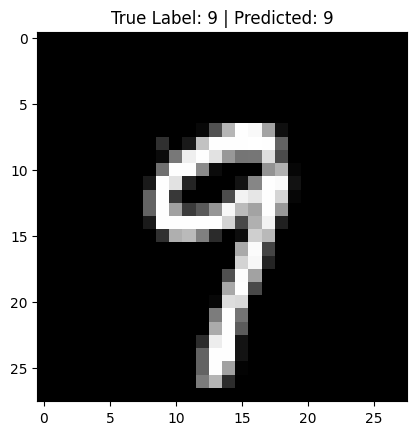

In [ ]:
i = np.random.randint(0, len(X_test))
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')

prediction = model.predict(X_test[i].reshape(1, 28, 28, 1))
predicted_label = prediction.argmax()

plt.title(f"True Label: {y_test[i]} | Predicted: {predicted_label}")
plt.show()


# Updated CNN with Dropout

In [ ]:
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25), #Regularization
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
     layers.Dropout(0.25), #Regularization

    # Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25), #Regularization

    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8439 - loss: 0.4790 - val_accuracy: 0.9843 - val_loss: 0.0509
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9710 - loss: 0.0951 - val_accuracy: 0.9889 - val_loss: 0.0341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9779 - loss: 0.0704 - val_accuracy: 0.9889 - val_loss: 0.0335
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9829 - loss: 0.0574 - val_accuracy: 0.9907 - val_loss: 0.0295
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9840 - loss: 0.0518 - val_accuracy: 0.9894 - val_loss: 0.0300


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 3s - 9ms/step - accuracy: 0.9894 - loss: 0.0300
Test Accuracy: 0.9894


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


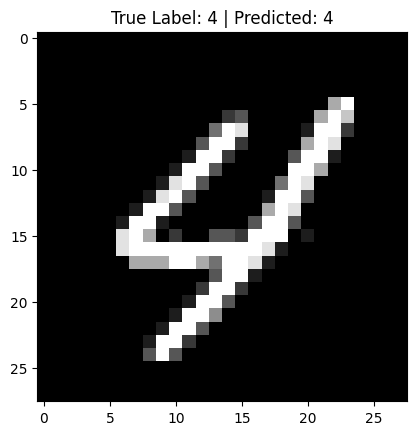

In [ ]:
i = np.random.randint(0, len(X_test))
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')

prediction = model.predict(X_test[i].reshape(1, 28, 28, 1))
predicted_label = prediction.argmax()

plt.title(f"True Label: {y_test[i]} | Predicted: {predicted_label}")
plt.show()


# Tasks: CNN Tasks

- Task 1 – Model Update
  - Add a third Convolutional Layer after the existing layers.
  - Train the updated model on the same dataset (same epochs and batch size).
  - Record the training and validation accuracy/loss after adding the new layer.
  - Compare the performance before and after adding the third Conv layer.

  - Discuss:

    - Did accuracy improve or drop?
    - Did overfitting increase?
    - How did training time change?

- Task 2 – Image Testing
  - Load a sample image from your computer (paint).
  - Preprocess it (resize, normalize, reshape).
  - Use the trained model to predict the class.
  - Display both the image and the predicted label.

- Task 3-  Check Dataset Splitting and fix it
    - And Discuss:

    - Did accuracy improve or drop?
    - Did overfitting increase?
    - How did training time change?

  
- Task 4 — EarlyStopping Behavior Analysis
Enable EarlyStopping with:
    ```python
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ```
    Analyze:

    1. At which epoch did training stop?  
    2. Why does the validation loss control this decision?  
    3. What happens if you increase patience (to 5 and to 10)?  
    4. Explain how EarlyStopping acts as an indirect form of regularization.

- Task 5 — Compare between ANN and CNN

---